### 1. Importação das Bibliotecas

In [1]:
# Bibliotecas
import numpy as np # Biblioteca para operações de álgebra linear
from PIL import Image # Biblioteca para manipular as imgs (fazer a leitura, plotar, etc)
import pandas as pd # Biblioteca para manipulação de dados e álgebra linear
import matplotlib.pyplot as plt # Biblioteca para visualização de dados
from glob import glob # Módulo para encontrar arquivos dado um diretório
#import cv2  

%matplotlib inline

### 2. Criando datasets que contém o diretório de cada imagem

In [2]:
data_dir = './CrackForest-dataset-master/image' # Acessar o diretório com as imagens
image_files = glob(data_dir + '/*.jpg') # Criar um dataset com todos os diretórios das imgs

data_dir_asphalt_crack = './Asphalt Crack Dataset/448/Cracks' # Acessar o diretório com as imagens
asphalt_crack_files = glob(data_dir_asphalt_crack + '/*.jpg') # Criar um dataset com todos os diretórios das imgs

data_dir_asphalt_noncrack = './Asphalt Crack Dataset/448/NonCracks' # Acessar o diretórbio com as imagens
asphalt_noncrack_files = glob(data_dir_asphalt_noncrack + '/*.jpg') # Criar um dataset com todos os diretórios das imgs

### 3. Criando funções para que, dado um dataset que tenha o diretório das imagens, duplique ou triplique o meu número de dados

In [3]:
# A função abaixo vai criar 2 datasets contendo os pixels de cada imagem contida no dataset dos Diretórios   
# O primeiro dataset contém as imgs originais, o segundo contém as imgs rotacionadas em 180°
# E no final vai nos retornar um dataset que junta os dois anteriores, dessa forma consigo
# duplicar meu número de dados

def df_create_2(df_name, df_name_rotate, image_data): # (dataframe1 vazio, dataframe1 rotacionado vazio, dataset do diretório)    
    for file in range(0, len(image_data),1): # com esse for vamos varrer cada linha do meu dataset com os dir
        img1 = Image.open(image_data[file],'r') # Estamos lendo as imgs do dataset que contém os dirs
        img1 = img1.convert('L') # Transformando a img para greyscale
        img1 = img1.resize((100, 100),Image.ANTIALIAS) 
        img1_rotate = img1.rotate(180) # Rotacionando a img em 180°
        
        img1_n = np.asarray(img1.getdata(), dtype=np.float64) # Convertendo a img para pixels e salvando em um Numpy Array de 1 dimensão   
        img1_n_rotate = np.asarray(img1_rotate.getdata(), dtype=np.float64) # Fazendo a mesma coisa para a imagem rotacionada
        
        df_name[file] = img1_n # Adicionando os pixels de uma img no dataframe1 vazio
        df_name_rotate[file] = img1_n_rotate # Mesma coisa para as imgs rotacionadas
        
    df_name = df_name.T # Pegando a transposta da Matrix para que as linhas sejam as imagens e as colunas seus pixels
    df_name_rotate = df_name_rotate.T # Pegando a transposta da Matrix para que as linhas sejam as imagens e as colunas seus pixel
    df_concat = pd.concat([df_name,df_name_rotate], ignore_index=True) # Juntando as duas matrizes 
    return df_concat # Retornando o DataFrame(Matriz) Desejada

In [4]:
# A função abaixo faz a mesma coisa que a df_create_2, porém ela triplica o meu número de imagem
# Ou seja, ela criar três dataframes(matrizes), o primeiro sendo as imgs originais
# O segundo as imgs rotacionadas em 90° e o terceiro as imgs rotacionadas em 180°
def df_create_3(df_name, df_name_rotate90,df_name_rotate180, image_data):
    #df_name = pd.DataFrame()
    for file in range(0, len(image_data),1):
        img1 = Image.open(image_data[file],'r')
        img1 = img1.convert('L') # Makes it greyscale
        img1 = img1.resize((100, 100),Image.ANTIALIAS)
        img1_rotate90 = img1.rotate(90)
        img1_rotate180 = img1.rotate(180)
        
        img1_n = np.asarray(img1.getdata(), dtype=np.float64)
        img1_n_rotate90 = np.asarray(img1_rotate90.getdata(), dtype=np.float64)
        img1_n_rotate180 = np.asarray(img1_rotate180.getdata(), dtype=np.float64)

        df_name[file] = img1_n
        df_name_rotate90[file] = img1_n_rotate90
        df_name_rotate180[file] = img1_n_rotate180
        
    df_name = df_name.T
    df_name_rotate90 = df_name_rotate90.T
    df_name_rotate180 = df_name_rotate180.T
    df_concat = pd.concat([pd.concat([df_name,df_name_rotate90], ignore_index=True),df_name_rotate180], ignore_index=True)   
    #df_concat = df_concat.reset_index().drop('index', axis=1)
    return df_concat

In [5]:
# Função que vai aplicar um filtro em todas as imagens do meu DataFrame
# Função copiada do curso de introdução ao TensorFlow
# Link: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb
def df_filter(df_original):
    df_transformed = pd.DataFrame()
    for k in range(0, len(df_original)-1, 1):
        i = np.asarray(df_original.loc[k,:]).reshape(100,100)
        i_transformed = np.copy(i)
        size_x = i_transformed.shape[0]
        size_y = i_transformed.shape[1]
        filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
        weight  = 1
        for x in range(1,size_x-1):
          for y in range(1,size_y-1):
              convolution = 0.0
              convolution = convolution + (i[x - 1, y-1] * filter[0][0])
              convolution = convolution + (i[x, y-1] * filter[0][1])
              convolution = convolution + (i[x + 1, y-1] * filter[0][2])
              convolution = convolution + (i[x-1, y] * filter[1][0])
              convolution = convolution + (i[x, y] * filter[1][1])
              convolution = convolution + (i[x+1, y] * filter[1][2])
              convolution = convolution + (i[x-1, y+1] * filter[2][0])
              convolution = convolution + (i[x, y+1] * filter[2][1])
              convolution = convolution + (i[x+1, y+1] * filter[2][2])
              convolution = convolution * weight
              if(convolution<0):
                convolution=0
              if(convolution>255):
                convolution=255
              i_transformed[x, y] = convolution

        new_x = int(size_x/2)
        new_y = int(size_y/2)
        newImage = np.zeros((new_x, new_y))
        for x in range(0, size_x, 2):
          for y in range(0, size_y, 2):
            pixels = []
            pixels.append(i_transformed[x, y])
            pixels.append(i_transformed[x+1, y])
            pixels.append(i_transformed[x, y+1])
            pixels.append(i_transformed[x+1, y+1])
            newImage[int(x/2),int(y/2)] = max(pixels)
        df_transformed[k] = newImage.flatten()
    return df_transformed.T

### 4. Criando/carregando os datasets onde cada linha representa uma imagem e cada coluna representa os pixels dessa imagem

In [6]:
# DataFrame 1 com imagens de rachaduras, utilizando a função df_create_2
df_crack1 = pd.DataFrame()
df_crack1_rotate = pd.DataFrame()
df_crack1 = df_create_2(df_crack1, df_crack1_rotate, image_files)

# Dataframe 2 com imagens de rachadura, utilizando a função df_create_2
df_crack2 = pd.DataFrame()
df_crack2_rotate = pd.DataFrame()
df_crack2 = df_create_2(df_crack2, df_crack2_rotate, asphalt_crack_files)

# Dataframe 3 combinando os Dataframes 1 e 2, totalizando 710 imagens de rachaduras
df_crack = pd.concat([df_crack1, df_crack2], ignore_index=True)
df_crack_filter = df_filter(df_crack) # É o mesmo dataframe df_crack mas com filtro

# Dataframe com imagens sem rachaduras
# Aqui eu chamo a função df_create_3 e triplico o número de dados que tenho de imgs sem rachaduras 
df_non_crack = pd.DataFrame()
df_non_crack_rotate90 = pd.DataFrame()
df_non_crack_rotate180 = pd.DataFrame()
df_non_crack = df_create_3(df_non_crack, df_non_crack_rotate90, df_non_crack_rotate180, asphalt_noncrack_files)
df_non_crack_filter = df_filter(df_non_crack) # É o mesmo dataframe df_non_crack mas com filtro

In [66]:
# load the oilspill dataset
oil_spill = pd.read_csv('./Oil Spill/OilSpill_Dataset.csv', header=None)
oil_spill

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [ ]:
# Load the lanslide dataset

### 5. Visualização dos DataFrames

* Dataframe com as imagens de rachaduras: 710 imagens
* Dataframe com as imagens sem rachaduras: 600 imagens

In [45]:
# Criando a coluna label (target value)
df_crack['label'] = 1
df_crack_filter['label'] = 1
df_non_crack['label'] = 0
df_non_crack_filter['label'] = 0

crack_noncrack = pd.concat([df_crack, df_non_crack], ignore_index=True)
crack_noncrack = df_final.sample(frac=1) # Embaralhando as linhas
# The df_final_filter is the same as df_final but it has the convolution
crack_noncrack_filter = pd.concat([df_crack_filter, df_non_crack_filter], ignore_index=True)
crack_noncrack_filter = df_final_filter.sample(frac=1) # Embaralhando as linhas

In [46]:
crack_noncrack

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
994,144.0,153.0,158.0,151.0,148.0,147.0,149.0,157.0,149.0,151.0,...,175.0,201.0,189.0,178.0,170.0,184.0,181.0,161.0,188.0,0
9,118.0,131.0,133.0,130.0,139.0,143.0,133.0,149.0,142.0,141.0,...,147.0,140.0,134.0,135.0,143.0,145.0,142.0,141.0,140.0,1
52,124.0,124.0,116.0,115.0,118.0,123.0,120.0,123.0,125.0,121.0,...,116.0,104.0,110.0,113.0,101.0,107.0,108.0,112.0,114.0,1
869,180.0,174.0,175.0,179.0,183.0,181.0,187.0,192.0,192.0,201.0,...,172.0,165.0,169.0,168.0,171.0,168.0,156.0,161.0,153.0,0
348,134.0,112.0,132.0,164.0,170.0,146.0,139.0,152.0,145.0,94.0,...,134.0,140.0,148.0,150.0,141.0,143.0,150.0,164.0,130.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,115.0,139.0,142.0,136.0,98.0,82.0,58.0,93.0,147.0,105.0,...,186.0,169.0,176.0,172.0,151.0,165.0,149.0,165.0,160.0,1
490,220.0,157.0,142.0,166.0,169.0,146.0,148.0,191.0,158.0,178.0,...,195.0,169.0,144.0,149.0,141.0,156.0,146.0,179.0,181.0,1
668,111.0,68.0,110.0,113.0,172.0,182.0,161.0,164.0,165.0,165.0,...,99.0,99.0,96.0,94.0,103.0,106.0,102.0,121.0,117.0,1
784,191.0,182.0,122.0,131.0,126.0,176.0,171.0,128.0,162.0,143.0,...,121.0,129.0,122.0,152.0,154.0,129.0,147.0,153.0,165.0,0


In [21]:
# Exportando os Dataframes
#df_final.to_csv('df_final.csv', index=False)
#df_final_filter.to_csv('df_final_filter.csv', index=False)

### 6. Visualizando as imagens dos DataFrames

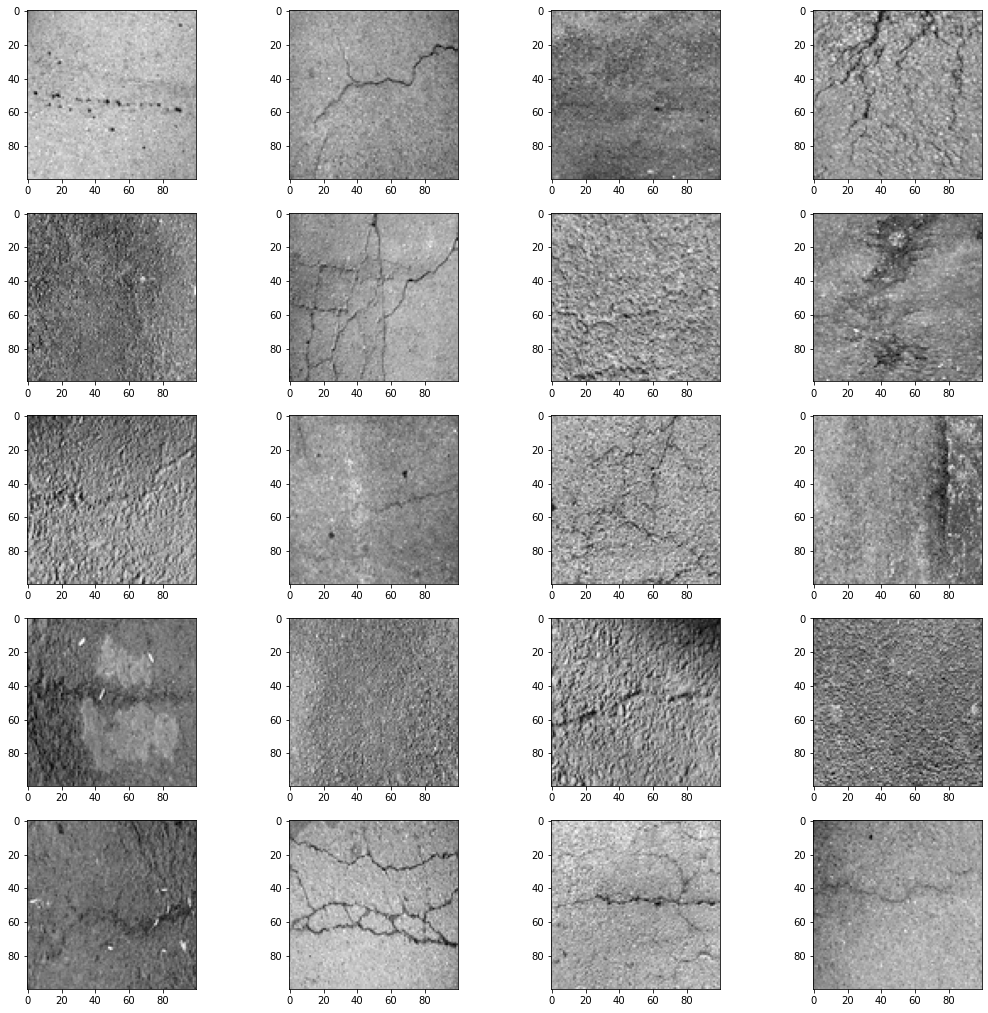

In [47]:
# Crack and Non-Crack Images
w=10
h=10
fig=plt.figure(figsize=(18,18))
columns = 4
rows = 5
for i in range(1, columns*rows + 1):
    img = crack_noncrack.iloc[i,crack_noncrack.columns != 'label'].values.reshape(100,100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

# 7. Criando os modelos de Machine Learning

In [48]:
import tensorflow as tf

In [62]:
# Let's import the train_test_split from Scikit-Learn to split the dataframe into
# train and test data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(crack_noncrack.loc[:,crack_noncrack.columns != 'label'],
                                                   crack_noncrack.loc[:,crack_noncrack.columns == 'label'],
                                                   shuffle=False,
                                                   random_state=42)

# Let's convert the dataframe into numpy array and reshape it into a way that 
# TensorFlow can work with
X_train = (np.array(X_train).reshape(982,100,100,1))/255.0
X_test = (np.array(X_test).reshape(328,100,100,1))/255.0
y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()

print('X_train_shape:',X_train.shape)
print('X_test_shape:',X_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)


X_train_shape: (982, 100, 100, 1)
X_test_shape: (328, 100, 100, 1)
y_train_shape: (982,)
y_test_shape: (328,)


In [63]:
model = tf.keras.models.Sequential([
    # First Convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second Convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(input_shape=(100,100)),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('non-crack') and 1 for the other ('cracks')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(
    # YOUR CODE STARTS HERE
    X_train, y_train, epochs=20
    # YOUR CODE ENDS HERE
)

Epoch 1/20
31/31 [==============================] - 5s 151ms/step - loss: 0.8240 - accuracy: 0.5204
Epoch 2/20
31/31 [==============================] - 5s 146ms/step - loss: 0.6447 - accuracy: 0.6202
Epoch 3/20
31/31 [==============================] - 5s 146ms/step - loss: 0.6388 - accuracy: 0.6487
Epoch 4/20
31/31 [==============================] - 5s 149ms/step - loss: 0.6576 - accuracy: 0.6914
Epoch 5/20
31/31 [==============================] - 5s 145ms/step - loss: 0.5208 - accuracy: 0.7454
Epoch 6/20
31/31 [==============================] - 5s 149ms/step - loss: 0.4863 - accuracy: 0.7851
Epoch 7/20
31/31 [==============================] - 5s 148ms/step - loss: 0.4539 - accuracy: 0.8167
Epoch 8/20
31/31 [==============================] - 5s 148ms/step - loss: 0.4135 - accuracy: 0.8228
Epoch 9/20
31/31 [==============================] - 5s 149ms/step - loss: 0.3679 - accuracy: 0.8432
Epoch 10/20
31/31 [==============================] - 5s 146ms/step - loss: 0.3090 - accuracy: 0.8676

In [64]:
y_pred_train = model.predict(X_train)
for i in range(0,len(y_pred_train)-1,1):
    if (y_pred_train[i]>0.5):
        y_pred_train[i]=1
    else:
        y_pred_train[i]=0

y_pred_train = np.array(y_pred_train).flatten()
print(y_pred_train == y_train)
print(' ')
print('Percentage correct in train_set:',np.sum(y_pred_train == y_train)/len(y_train))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [65]:
y_pred = model.predict(X_test)
for i in range(0,len(y_pred)-1,1):
    if (y_pred[i]>0.5):
        y_pred[i]=1
    else:
        y_pred[i]=0

y_pred = np.array(y_pred).flatten()
print(y_pred == y_test)
print(' ')
print('Percentage correct in test_set:',np.sum(y_pred == y_test)/len(y_test))

[False False  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False  True False  True
  True False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  T